![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
df1 = pd.read_excel("files_for_lab/excel_files/marketing_customer_analysis.xlsx")

def one_to_rule(df):
    
    cols = df.columns
    new_cols = []
    rows = df.shape[0]
    
    for col in cols:
        new_col = ""
        for letter in col:
            if letter == " ":
                letter = "_"
                new_col += letter
            else:
                new_col += letter
        new_cols.append(new_col.lower())
    df.columns = new_cols
    
    for col in new_cols:
        na = df[col].isna().sum()
        if na > (25*rows/100):
            df = df.drop([col], axis=1)
        else: df = df[df[col].isna()==False]
    df.drop(columns=df.columns[0], axis=1, inplace=True)
    
    return df

df1 = one_to_rule(df1)

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.

In [7]:
df1

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


- Describe DataFrame.

In [8]:
df1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


- Show a plot of the total number of responses.

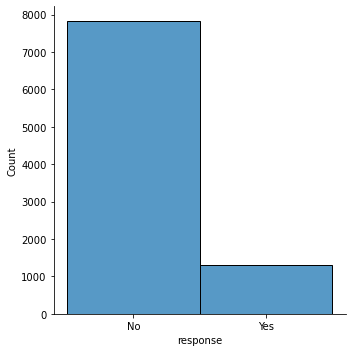

In [30]:
sns.displot(df1['response'])
plt.show()

- Show a plot of the response rate by the sales channel.

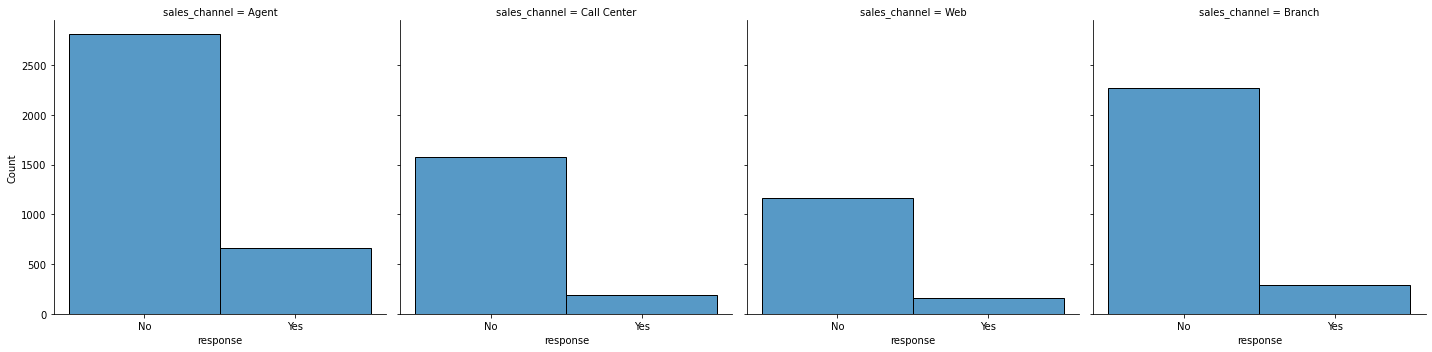

In [55]:
sns.displot(
    df1, x="response", col="sales_channel")

- Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

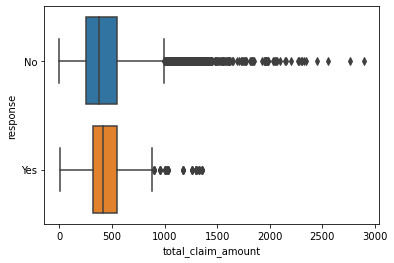

In [58]:
sns.boxplot(data=df1, x="total_claim_amount", y="response")

- Show a plot of the response rate by income.

<AxesSubplot:xlabel='income', ylabel='response'>

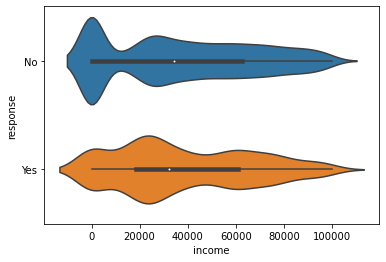

In [64]:
sns.violinplot(data=df1, x="income", y="response")